## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [3]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [4]:

# Combine the data into a single dataset
study_mouse_complete = pd.merge(mouse_metadata, study_results, how="outer", on=['Mouse ID'])


# Display the data table for preview
study_mouse_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_count= study_mouse_complete.count()
mouse_count

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_duplicates= study_mouse_complete.duplicated(subset=['Mouse ID','Timepoint'])
mouse_duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

study_mouse_complete.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_data= study_mouse_complete.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')
mouse_clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics = mouse_clean_data[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').describe()
summary_statistics

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  156.0  52.382993  6.574208  45.000000  47.046068   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.783528  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [11]:
sem_summary = mouse_clean_data[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').sem()
sem_summary

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.526358
Ramicane,0.320955
Stelasyn,0.573111


In [12]:
var_summary = mouse_clean_data[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').var()
var_summary

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.220205
Ramicane,23.486704
Stelasyn,59.450562


In [13]:
mouse_summary=pd.DataFrame({'Mean':summary_statistics['Tumor Volume (mm3)']['mean'],'Median': summary_statistics['Tumor Volume (mm3)']['50%'], 'Variance': var_summary['Tumor Volume (mm3)'], 'Standard deviation':summary_statistics['Tumor Volume (mm3)']['std'], "SEM": sem_summary['Tumor Volume (mm3)']})
mouse_summary

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

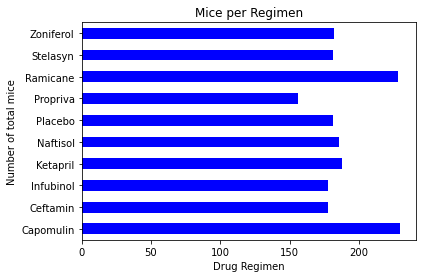

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_regimen_barplot= summary_statistics['Tumor Volume (mm3)']["count"].plot(kind='barh',color='b')
drug_regimen_barplot
plt.title("Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of total mice")
plt.savefig("images/Miceregimenpandas.png")

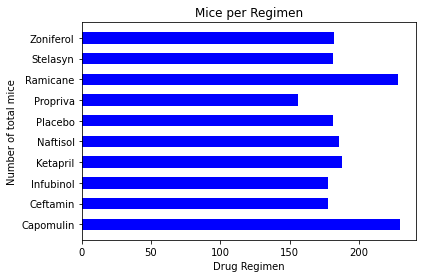

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen_summary = summary_statistics.reset_index()
x_axis = np.arange(len(summary_statistics))
barWidth = 0.55
plt.barh(x_axis, summary_statistics['Tumor Volume (mm3)']["count"], color='b', height=barWidth)
plt.yticks(x_axis, drug_regimen_summary['Drug Regimen'], rotation="horizontal")
plt.title("Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of total mice")
plt.savefig("images/Miceregimenpyplot.png")


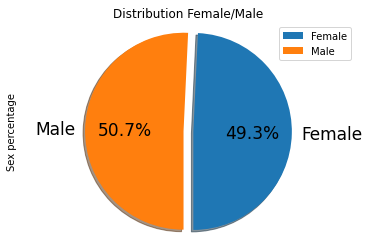

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_sex = mouse_clean_data.groupby(["Sex"]).count()
distribution_pieplot = count_sex.plot(kind = 'pie', y = ('Mouse ID'), title='Distribution Female/Male', autopct="%1.1f%%", startangle=270, explode=(0,0.1), shadow= True, fontsize= 17)
distribution_pieplot.set_ylabel("Sex percentage")
plt.axis("equal");
plt.savefig("images/distributionpandas.png")
plt.show() 

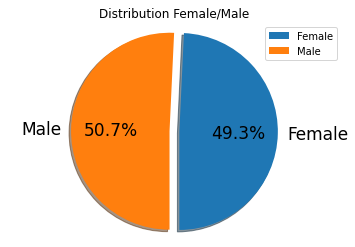

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_sex_index= count_sex.reset_index()
sex_label= count_sex_index['Sex']
mice_sex_total = count_sex_index['Drug Regimen']
explode = (0,0.1)
plt.pie(mice_sex_total, explode=explode, labels=sex_label , autopct="%1.1f%%", shadow=True, startangle=270, textprops={'fontsize': 17} )
plt.title('Distribution Female/Male')
plt.legend(loc= 'best' )
plt.axis("equal")
plt.savefig("images/distributionpyplot.png")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#final_tumor_volume=  mouse_clean_data.groupby(["Drug Regimen"])
final_tumor = mouse_clean_data.loc[mouse_clean_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = final_tumor.groupby('Mouse ID').max()
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint_clean = greatest_timepoint.loc[:, ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_timepoint = pd.merge(mouse_clean_data, greatest_timepoint_clean, how= 'inner', on= ['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint'])
tumor_volume_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,i557,Capomulin,Female,1,24,45,47.685963,1
1,a203,Infubinol,Female,20,23,45,67.973419,2
2,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a577,Infubinol,Female,6,25,30,57.031862,2
5,a685,Infubinol,Male,8,30,45,66.083066,3
6,b447,Ceftamin,Male,2,30,0,45.000000,0
7,b487,Ceftamin,Female,6,28,25,56.057749,1
8,b759,Ceftamin,Female,12,25,30,55.742829,1
9,c139,Infubinol,Male,11,28,45,72.226731,2


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

x_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments = [value for value in x_drugs]
x_drugs

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= np.arange(len(tumor_volume_timepoint['Tumor Volume (mm3)']))
tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volume_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for x in range(len(tumor_volume_timepoint['Tumor Volume (mm3)'])):
        if tumor_volume_timepoint['Drug Regimen'].iloc[x]=="Capomulin":
            tumor_vol_capomulin.append(tumor_volume_timepoint['Tumor Volume (mm3)'].iloc[x])
        if tumor_volume_timepoint['Drug Regimen'].iloc[x]=="Infubinol":
            tumor_vol_infubinol.append(tumor_volume_timepoint['Tumor Volume (mm3)'].iloc[x])
        if tumor_volume_timepoint['Drug Regimen'].iloc[x]=="Ceftamin":
            tumor_vol_ceftamin.append(tumor_volume_timepoint['Tumor Volume (mm3)'].iloc[x])
        else:
            tumor_vol_ramicane.append(tumor_volume_timepoint['Tumor Volume (mm3)'].iloc[x])
                
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
df_capomulin = pd.DataFrame(tumor_vol_capomulin)
quartiles_capomulin =df_capomulin[0].quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

df_ramicane = pd.DataFrame(tumor_vol_ramicane)
quartiles_ramicane =df_ramicane[0].quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

df_infubinol = pd.DataFrame(tumor_vol_infubinol)
quartiles_infubinol =df_infubinol[0].quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

df_ceftamin = pd.DataFrame(tumor_vol_ceftamin)
quartiles_ceftamin =df_ceftamin[0].quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

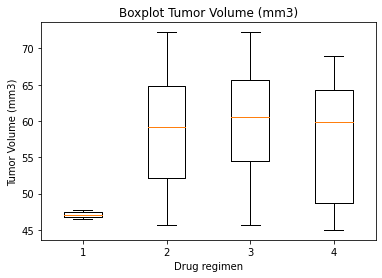

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data=[tumor_vol_capomulin,tumor_vol_ramicane,tumor_vol_infubinol,tumor_vol_ceftamin]
plt.boxplot(box_plot_data)
plt.title('Boxplot Tumor Volume (mm3)')
plt.xlabel('Drug regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig("images/boxplottumor.png")
plt.show()


## Line and Scatter Plots

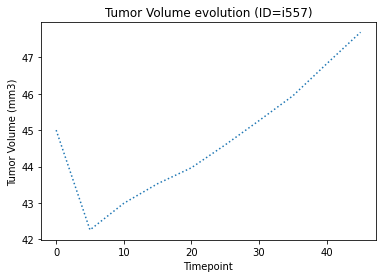

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data_mouse_capomulin_unique=mouse_clean_data.loc[mouse_clean_data["Mouse ID"]=="i557"]
plt.plot(data_mouse_capomulin_unique["Timepoint"],data_mouse_capomulin_unique["Tumor Volume (mm3)"], linestyle = 'dotted')
plt.title('Tumor Volume evolution (ID=i557)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig("images/lineplot.png")

plt.show()



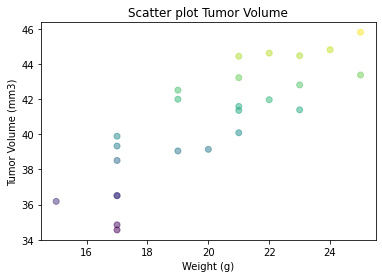

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
data_mouse_capomulin=mouse_clean_data.loc[mouse_clean_data["Drug Regimen"]=="Capomulin"]
data_mouse_capomulin=data_mouse_capomulin.groupby("Mouse ID").mean()
plt.scatter(data_mouse_capomulin["Weight (g)"], data_mouse_capomulin["Tumor Volume (mm3)"], alpha=0.5, c=data_mouse_capomulin["Tumor Volume (mm3)"])
plt.title('Scatter plot Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig("images/scatterplot.png")
plt.show()


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as st

correlation = st.pearsonr(data_mouse_capomulin["Weight (g)"],data_mouse_capomulin["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


In [24]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(data_mouse_capomulin["Weight (g)"], data_mouse_capomulin["Tumor Volume (mm3)"])
vc_fit = vc_slope * data_mouse_capomulin["Weight (g)"] + vc_int
vc_slope

0.9544396890241048

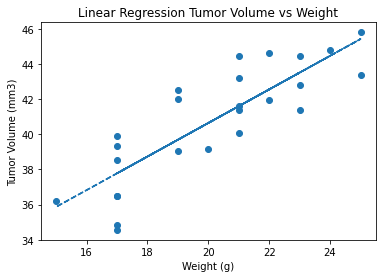

In [25]:

plt.scatter(data_mouse_capomulin["Weight (g)"],data_mouse_capomulin["Tumor Volume (mm3)"])
plt.plot(data_mouse_capomulin["Weight (g)"],vc_fit,"--")
plt.title('Linear Regression Tumor Volume vs Weight')
#plt.xticks(data_mouse_capomulin["Weight (g)"], rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)');
plt.savefig("images/regression.png")

# CONCLUSION

The boxplot shows the variability of the size of the tumor for the last timepoint available. We can see a remarkable difference among all 4 drug regimen. Capomulin shows the lowest variability but this is due to there are only two data points. Ceftamin shows the second lower variability as well as a biased distribution to the right hand side 

The mouse i557 had an abrupt decrease in the tumor volume when it was measuared in day 5, after this it started to grow up again at slower rate.

There is a positive strong linear relation between mice's weight and the tumor volume,that means the bigger the mouse the bigger the tumor, this is confirm with the correlation value of 0.84.The slope confirms that for each extra gram of weight, the tumor will increase in 0.95 mm3.

